#### Jericho McLeod<br>CSI-873<br>Homework 9


Implement a weighted k-nearest neighbor algorithm for the available hand-written training data. Test the algorithm on the testing data. Provide accuracy results for the following 15 cases:

1) k = 1, 2, ..., 7; all the weights are equal to 1<br>
2) k = 1, 2, ..., 7; all the weights are calculated according to the formula: $$ w_i = \frac{1}{d(x_q,x_i)^2+\varepsilon},\varepsilon = 1 $$
3) k = all training points; all the weights are calculated according to the formula: $$ w_i = \frac{1}{d(x_q,x_i)^2+\varepsilon},\varepsilon = 1 $$

The following four cells import the necessary libraries for importing, copying, and plotting, functions to import the data, statements to call the import functions and create data structures, and some verification that importing is complete.  

In [150]:
import csv,copy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def data_import(file):
    data = []
    with open(file, 'r') as csvfile:
        csv_r = csv.reader(csvfile,delimiter=' ')
        for row in csv_r:
            row_nums = []
            for i in range(len(row)):
                try:
                    val = float(row[i])
                    if i > 0:
                        val = round(val/255,4)
                        # The above line scales the data imported
                    row_nums.append(val)
                except:
                    print('ERROR on import: non-numerical data:',row[i])
                    break                    
            data.append(row_nums)
    return(data)

In [105]:
def data_import_loop(string,denom):
    files = []
    data_dict = {}
    for i in range(10):
        file_name = string+str(i)+'.txt'
        files.append(file_name)
        data_dict[i]=[]
    for i in files:
        data = data_import(i)
        for j in range(len(data)):
            if j%denom==0: # SUBSET data 
                data_dict[data[j][0]].append(data[j][1:])
    return(data_dict)

In [ ]:
denom = 5
data_dict = data_import_loop('train',denom)
denom = 4
test_dict = data_import_loop('test',denom)

In [106]:
for i in range(10):
    print(i,'   Training Obs:',len(data_dict[i]),'   Testing Obs:',len(test_dict[i]))

0    Training Obs: 1185    Testing Obs: 245
1    Training Obs: 1349    Testing Obs: 284
2    Training Obs: 1192    Testing Obs: 258
3    Training Obs: 1227    Testing Obs: 253
4    Training Obs: 1169    Testing Obs: 246
5    Training Obs: 1085    Testing Obs: 223
6    Training Obs: 1184    Testing Obs: 240
7    Training Obs: 1253    Testing Obs: 257
8    Training Obs: 1171    Testing Obs: 244
9    Training Obs: 1190    Testing Obs: 253


The following cells subset data to 250 of each digit in the training data and 50 of each digit in the testing data, the verify the subset is completed.  

This is not a randomized function, merely trimming the first X observations.

In [107]:
data_subset = {}
test_subset = {}
for i in range(10):
    for j in range(250):
        if i in data_subset:
            data_subset[i].append(data_dict[i][j])
        else:
            data_subset[i] = [data_dict[i][j]]
    for j in range(50):
        if i in test_subset:
            test_subset[i].append(test_dict[i][j])
        else:
            test_subset[i] = [test_dict[i][j]]

In [108]:
for k,v in data_subset.items():
    print(k,len(v),len(test_subset[k]))

0 250 50
1 250 50
2 250 50
3 250 50
4 250 50
5 250 50
6 250 50
7 250 50
8 250 50
9 250 50


The following cell merely converts the data to a list of lists rather than a dictionary for simplified loops in following functions.

In [109]:
d_matrix = []
d_results = []
for k,v in data_subset.items():
    for i in v:
        d_matrix.append(i)
        d_results.append(k)

This function below calculates the euclidean distance of two vectors. 

In [110]:
def euclidean(v1,v2):
    if len(v1)==len(v2):
        sq = 0
        for i in range(len(v1)):
            sq += (v1[i]-v2[i])**2
        dist = sq**0.5
        return(dist)
    else:
        print('Error: vectors not the same length')

This function uses K-Nearest Neighbors to classify an instance. It first creates a set of temporary data structures, then finds the euclidean distance to each point in the training to do the target instance and, if needed, the weight of that distance, then finds the K nearest neighbors, and finally uses these to classify the new instance.

In [111]:
def knn_class(data,input_results,k,w,target):
    # Setting up temp data structures
    results = copy.deepcopy(input_results)
    dist_vec,weight_vec,knn,class_dict = [],[],[],{}

    # Find Euclidean distance and weights for all points
    for i in data:
        dist = euclidean(i,target)
        dist_vec.append(dist)
        if w == True:
            weight = 1 / (1 + dist**2)
            weight_vec.append(weight)
            
    # Find the K nearest neighbors
    for i in range(k):
        min_index = dist_vec.index(min(dist_vec))
        d0 = dist_vec.pop(min_index)
        r0 = results.pop(min_index)
        if w == True:
            w0 = weight_vec.pop(min_index)
        else: w0 = 1
        knn.append([d0,w0,r0])
    
    # Make classification
    for i in knn:
        #print(i)
        if i[2] not in class_dict:
            class_dict[i[2]] = i[1]
        else:
            class_dict[i[2]] += i[1]
    return(max(class_dict, key=class_dict.get))

I will report on the overall accuracy of the model using confidence intervals over the entire model, not by individual digit. Confidence Intervals calculated as:$$ errors_S (h) \pm z_N \sqrt{ \frac{errors_S (h)(1-error_S (h))}{n} }$$

In [113]:
def confidence(n,p,z):
    conf = z * (((p*(1-p))/n)**0.5)
    return(conf)

#### Part 1

In [114]:
for i in range(1,8):
    correct = 0
    total = 0
    for k,v in test_subset.items():
        total+=len(v)
        for j in v:
            knn_out = knn_class(d_matrix,d_results,i,False,j)
            #print(i,k,len(j),knn_out)
            if knn_out == k:
                correct+=1
    ratio = correct / total
    ci = confidence(total,ratio,1.96)
    print(i,ratio,ci)

1 0.898 0.02652829408763405
2 0.898 0.02652829408763405
3 0.912 0.024831892783273687
4 0.904 0.025822060893739673
5 0.912 0.024831892783273687
6 0.918 0.02404912811725198
7 0.902 0.02606077794694548


#### Part 2

In [115]:
for i in range(1,8):
    correct = 0
    total = 0
    for k,v in test_subset.items():
        total+=len(v)
        for j in v:
            knn_out = knn_class(d_matrix,d_results,i,True,j)
            #print(i,k,len(j),knn_out)
            if knn_out == k:
                correct+=1
    ratio = correct / total
    ci = confidence(total,ratio,1.96)
    print(i,ratio,ci)

1 0.898 0.02652829408763405
2 0.898 0.02652829408763405
3 0.912 0.024831892783273687
4 0.908 0.025334241555649534
5 0.914 0.024574992427262306
6 0.922 0.02350627599599732
7 0.904 0.025822060893739673


#### Part 3

In [116]:
correct = 0
total = 0
for k,v in test_subset.items():
    total+=len(v)
    for j in v:
        knn_out = knn_class(d_matrix,d_results,len(d_results),True,j)
        #print(i,k,len(j),knn_out)
        if knn_out == k:
            correct+=1
ratio = correct / total
ci = confidence(total,ratio,1.96)
print(i,ratio,ci)

7 0.652 0.04175269269400477


#### Discussion of results

To prevent loss of data across multiple runs, I have copied out a set of results and will use them for charts. 

Similar results can be obtained by re-running this notebook with 250 of each number in the training data, and 50 of each number in the testing data. 

In [145]:
x_results = [0.898,0.898, 0.912, 0.904, 0.912, 0.918, 0.902] 
x_w_results = [0.898,0.898, 0.912, 0.908, 0.914, 0.922, 0.904 ]
x_errors = [0.02652829408763405,0.02652829408763405,\
            0.024831892783273687,0.025822060893739673,\
            0.024831892783273687,0.02404912811725198,\
            0.02606077794694548]
x_w_errors = [0.02652829408763405,0.02652829408763405,\
              0.024831892783273687,0.025334241555649534,\
              0.024574992427262306,0.02350627599599732,\
              0.025822060893739673]

y1,y2 = [],[]
for i in range(1,8):
    y1.append(i-0.07)
    y2.append(i+0.07)

In blue is shown the 95% confidence intervals (y-axis) for KNN from k=1 to k=7 (x-axis), while in green is the 95% confidence intervals (y-axis) for KNN from k=1 to k=7 (x-axis) with inverse square weights. Red shows the confidence interval when k= the number of training instances using inverse square weights. 

These are initially the same as the nearestt neighbors would all be weighted heavily. As the number of neighbors grows, however, the increased accuracy of the weighted KNN demonstrates that more distant neighbors are less accurate predictors of new instances.  

It is worth noting that k = number of instances resulted in a loss of accuracy. This is likely due to the density of the data relative to the total number of classifications. If there were fewer classes with more distinct spaces, weighting the distances would reduce the impact to considering all points. 

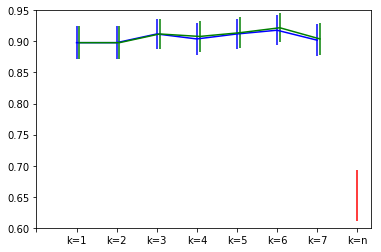

In [154]:
plt.ylim((.60, 0.95))
plt.errorbar(y, x_results, yerr=x_errors,color='b')
plt.errorbar(y2, x_w_results, yerr=x_w_errors, color='g')
plt.errorbar(8,0.652,yerr=0.04175269269400477,color='r')
plt.xticks(np.arange(9), ('','k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6','k=7','k=n'))
plt.show()